In [19]:
import utils
import skimage
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [20]:
def fill_holes(im: np.ndarray, starting_points: list, num_iterations: int) -> np.ndarray:
    """
    A function that takes a binary image (im), and a set of points 
    indicating positions of holes, and fills the holes.

    Args:
        im: np.ndarray of shape (H, W) with boolean values (dtype=bool)
        starting_points: list of list containing starting points (row, col). Ex:
            [[row1, col1], [row2, col2], ...]
        num_iterations: integer defining the number of iterations to apply the 
                        hole filling algorithm
    
    Returns:
        np.ndarray of shape (H, W), dtype=bool
    """
    ### START YOUR CODE HERE ###
    # Step 1: Define the structuring element (3x3 neighborhood for dilation)
    structuring_element = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ], dtype=bool)

    # Step 2: Initialize X0 as a blank image (all zeros) of the same shape as `im`
    filled_region = np.zeros_like(im, dtype=bool)

    # Step 3: Set the seed points (starting points) in the blank image to `True`
    for row, col in starting_points:
        filled_region[row, col] = True

    # Step 4: Compute the complement of the input binary image (`Ic`)
    image_complement = np.logical_not(im)

    # Step 5: Iteratively grow the filled region using dilation
    for i in range(num_iterations):
        # Perform dilation on the current filled region
        dilated = skimage.morphology.binary_dilation(filled_region, footprint=structuring_element)
        
        # Restrict the dilation to the complement of the original image (holes)
        filled_region = np.logical_and(dilated, image_complement)

    # Step 6: Combine the filled region with the original image using union (logical OR)
    result = np.logical_or(filled_region, im)

    return result
    ### END YOUR CODE HERE ###


Saving image to: image_processed\cards-filled.png


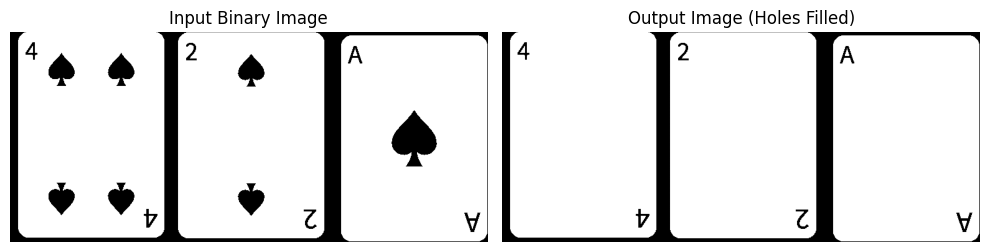

In [21]:
if __name__ == "__main__":
    im = io.imread('images/cards.png', as_gray=True)
    binary_image = im != 0  # Convert grayscale to binary
    starting_points = [ 
        # (row, column)
        [50, 80],
        [275, 80],
        [50, 175],
        [275, 175],
        [50, 390],
        [275, 390],
        [175, 650]
    ]
    num_iterations = 50

    # Perform hole filling
    result = fill_holes(binary_image, starting_points, num_iterations)

    # Assertions to ensure correct shape and type
    assert im.shape == result.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, result.shape)
    assert result.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
            result.dtype)

    # Save the result
    result = utils.to_uint8(result)
    utils.save_im("cards-filled.png", result)

    # Display the input and output images
    plt.figure(figsize=(10, 5))
    
    # Input Binary Image
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap="gray")
    plt.title("Input Binary Image")
    plt.axis("off")
    
    # Output Image
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap="gray")
    plt.title("Output Image (Holes Filled)")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
